<a href="https://colab.research.google.com/github/Samhithgb/PyTorchBrushUp/blob/master/WeatherPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline  

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate 
from zipfile import ZipFile
import requests 

In [4]:
bs = 64
  

In [5]:
def download_urls(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

download_urls("https://data.mendeley.com/datasets/4drtyfjtfy/1/files/a03e6097-f7fb-4e1a-9c6a-8923c6a0d3e0/dataset2.zip?dl=1","drive/My Drive/mendel.zip")

In [5]:
with ZipFile("drive/My Drive/mendel.zip", 'r') as zip: 
  zip.extractall("drive/My Drive/mendelextract")

In [6]:
path = start_path = Path('drive/My Drive/mendelextract')
path.ls()
path_data = path/'dataset2'

path_data.ls()
fnames = get_image_files(path_data)
fnames[:5]

[PosixPath('drive/My Drive/mendelextract/dataset2/sunrise284.jpg'),
 PosixPath('drive/My Drive/mendelextract/dataset2/sunrise285.jpg'),
 PosixPath('drive/My Drive/mendelextract/dataset2/sunrise286.jpg'),
 PosixPath('drive/My Drive/mendelextract/dataset2/sunrise287.jpg'),
 PosixPath('drive/My Drive/mendelextract/dataset2/sunrise288.jpg')]

In [7]:
doc(ImageDataBunch.from_name_func)

In [8]:
np.random.seed(2)


def get_labels(file_path): 
  o = str(file_path)
  if 'shine' in o: 
    return "shine" 
  elif 'sunrise' in o: 
    return "sunrise"
  elif 'rain' in o: 
    return 'rain'
  elif 'cloudy' in o: 
    return "cloudy"

data = ImageDataBunch.from_name_func(path_data, fnames, label_func=get_labels, ds_tfms= get_transforms(), size=24)
data.classes

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

['cloudy', 'rain', 'shine', 'sunrise']

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

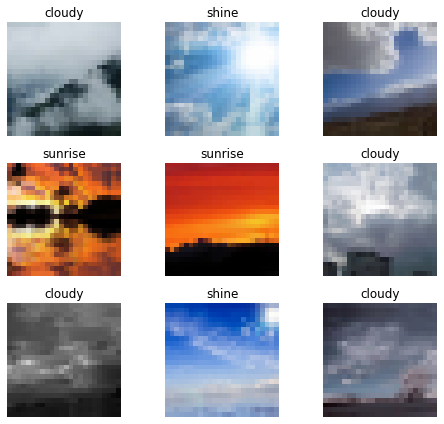

In [10]:
data.show_batch(rows=3, figsize=(7,6))

In [9]:
learner = cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learner.model

In [ ]:
doc(learner.fit_one_cycle)

In [11]:
learner.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.679218,0.536940,0.177778,00:16
1,0.646015,0.527995,0.182222,00:17
2,0.659849,0.473319,0.160000,00:17


Streaming output truncated to the last 5000 lines.
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please s

In [12]:
learner.save('stage-1')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

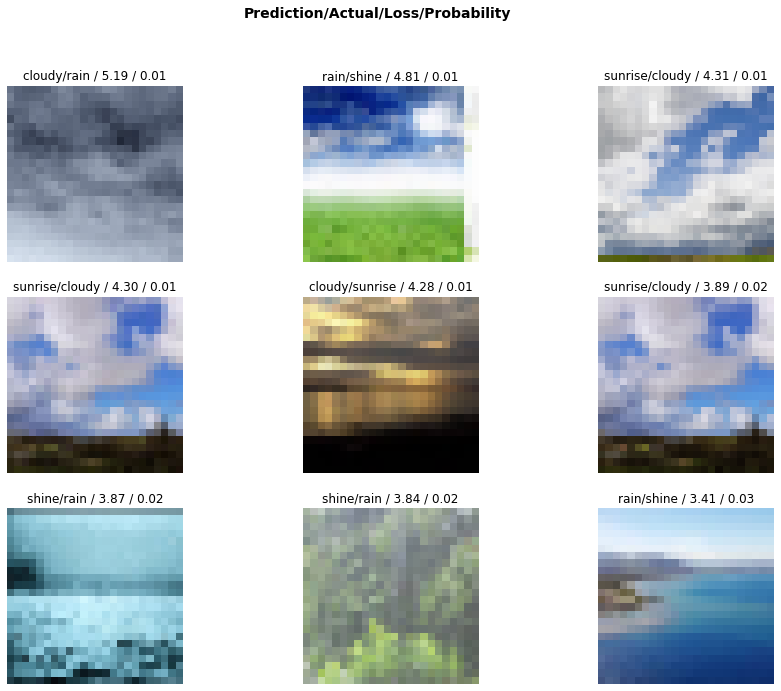

In [14]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_top_losses(9, figsize=(15,11))

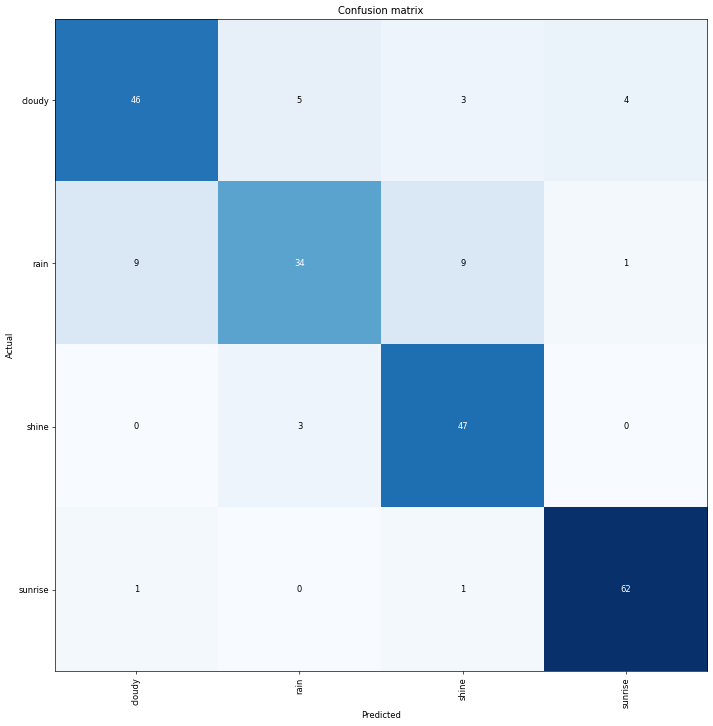

In [15]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [16]:
interp.most_confused(min_val=2)

[('rain', 'cloudy', 9),
 ('rain', 'shine', 9),
 ('cloudy', 'rain', 5),
 ('cloudy', 'sunrise', 4),
 ('cloudy', 'shine', 3),
 ('shine', 'rain', 3)]